This notebook contains various examples of how to read in tabulated data in Python.

Date Created: Fall 2016
<br>
Last Modified: Sep 7 2018
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

# 0. Character Encoding - How computers understand language
See links below for more information: 
<br>
https://docs.python.org/3/howto/unicode.html
<br>
https://stackoverflow.com/questions/2241348/what-is-unicode-utf-8-utf-16
<br>
http://kunststube.net/encoding/

In [2]:
chr(65) # Decimal

'A'

In [3]:
chr(0b01000001) # Binary

'A'

In [4]:
chr(0x41) # Hexadecimal 

'A'

In [5]:
ord('A') # Inverse of chr()

65

In [6]:
aphrase = [0x4A, 0x65, 0x67, 0x20, 0x6C, \
           0xE6, 0x72, 0x65, 0x72, 0x20, \
           0x50, 0x79, 0x74, 0x68, 0x6F, \
           0x6E, 0x2E]

for i in range(len(aphrase)):
    print(chr(aphrase[i]), end='')

Jeg lærer Python.

In [7]:
aphrase[0]

74

In [8]:
ord('æ')

230

In [9]:
chr(230)

'æ'

In [10]:
chr(0x1F603)

'😃'

In [11]:
ord('😃')

128515

# 1. Reading in text-based files in Python
Let's see how to read in a file in [.cvs format](https://en.wikipedia.org/wiki/Comma-separated_values).
<br>
We will try four different approaches: 
1. Writing our own custom function
2. Using the csv module in Python 
3. Using Numpy
4. Using Pandas

The Data is a .cvs file of the Flatiron track from [here](https://www.gpsies.com/map.do?fileId=xqmqtnuzirmzvjsm).
<br>
This section is inspired and adpated from https://janakiev.com/blog/csv-in-python/

## 1.1 Do-it-yourself 
Hard work but can learn a lot.

In [12]:
# Specify the path of the file
data_path = 'test_data/Flatiron.csv'

# Open the file and put it in read-only status
opened_file = open(data_path, 'r') 

print(opened_file)

<_io.TextIOWrapper name='test_data/Flatiron.csv' mode='r' encoding='UTF-8'>


In [13]:
# Initialise storage
# Assume that we know the first line is the header information and there are three columns of data separated by commas.
line_num = 1
header = []
data = [[], [], []]

for line in opened_file:
    if line_num == 1: # Read the header
        word = []
        for c in line:
            word.append(c)
            if c == ',' or c == '\n':
                word.pop()
                word_str = ''.join(word) # Convert a list of characters to a string
                header.append(word_str)
                
                word = []
                
    else: # Read the data
        word = []
        i = 0
        for c in line:
            word.append(c)
            if c == ',' or c == '\n':
                word.pop()
                word_str = ''.join(word) # Convert a list of characters to a string
                word_num = float(word_str) # Convert a string to a floating point number
                data[i].append(word_num)
                
                word = []
                i += 1
                i = i % 3
                
    line_num += 1
    
    

print(header)
print(data[0][0:7]) # print only the first 7 numbers out
print(data[1][0:7])
print(data[2][0:7])
print(line_num)

['Latitude', 'Longitude', 'Elevation']
[33.459392, 33.4593473, 33.4591735, 33.4589564, 33.4587619, 33.4585586, 33.4583752]
[-111.479671, -111.479915, -111.480037, -111.480118, -111.480153, -111.480167, -111.480208]
[632.0, 630.9667, 629.26666, 626.13336, 626.56665, 628.23334, 630.56665]
167


In [14]:
data[0]

[33.459392,
 33.4593473,
 33.4591735,
 33.4589564,
 33.4587619,
 33.4585586,
 33.4583752,
 33.4581901,
 33.4579955,
 33.4577825,
 33.4575768,
 33.4573889,
 33.4571853,
 33.4569762,
 33.4567937,
 33.456569,
 33.4563604,
 33.4562383,
 33.4562054,
 33.4559902,
 33.4558012,
 33.4556067,
 33.4555049,
 33.4553242,
 33.4552757,
 33.4551155,
 33.4549125,
 33.454712,
 33.4545122,
 33.4543543,
 33.4541544,
 33.4539382,
 33.4537627,
 33.4535519,
 33.4534854,
 33.453419,
 33.4533661,
 33.4532677,
 33.453102,
 33.4530431,
 33.4529165,
 33.4527571,
 33.4525634,
 33.4524344,
 33.4524084,
 33.4522698,
 33.4521557,
 33.4520143,
 33.4519195,
 33.4517641,
 33.4515666,
 33.4513877,
 33.451227,
 33.4510637,
 33.4510051,
 33.450935,
 33.4507925,
 33.4506576,
 33.4504721,
 33.4503048,
 33.450107,
 33.4499755,
 33.4498751,
 33.4497226,
 33.4495973,
 33.4494864,
 33.4493707,
 33.4491838,
 33.4490127,
 33.4488355,
 33.4486897,
 33.4485051,
 33.4483488,
 33.4482513,
 33.4480845,
 33.4479192,
 33.447748,
 33.4475

## 1.1 Python csv module
Better. More abstract. Still a bit clunky.

In [15]:
import csv

data_path = 'test_data/Flatiron.csv'

with open(data_path, 'r') as opened_file:
    cvs_file = csv.reader(opened_file, delimiter=',')
    
    # Get the header from the first line
    headers = next(cvs_file)
    
    # Get the data from the rest of the lines as a list
    data = list(cvs_file)

    
print(headers)
print(data[0:7])

['Latitude', 'Longitude', 'Elevation']
[['33.45939200', '-111.479671', '632.0'], ['33.45934730', '-111.479915', '630.9667'], ['33.45917350', '-111.480037', '629.26666'], ['33.45895640', '-111.480118', '626.13336'], ['33.45876190', '-111.480153', '626.56665'], ['33.45855860', '-111.480167', '628.23334'], ['33.45837520', '-111.480208', '630.56665']]


## 1.2 Numpy genfromtext 
Much Better. One line solution.

In [16]:
import numpy as np

data = np.genfromtxt('test_data/Flatiron.csv', delimiter=',', names=True)

In [17]:
print(type(data))

<class 'numpy.ndarray'>


In [18]:
data['Latitude']

array([ 33.459392 ,  33.4593473,  33.4591735,  33.4589564,  33.4587619,
        33.4585586,  33.4583752,  33.4581901,  33.4579955,  33.4577825,
        33.4575768,  33.4573889,  33.4571853,  33.4569762,  33.4567937,
        33.456569 ,  33.4563604,  33.4562383,  33.4562054,  33.4559902,
        33.4558012,  33.4556067,  33.4555049,  33.4553242,  33.4552757,
        33.4551155,  33.4549125,  33.454712 ,  33.4545122,  33.4543543,
        33.4541544,  33.4539382,  33.4537627,  33.4535519,  33.4534854,
        33.453419 ,  33.4533661,  33.4532677,  33.453102 ,  33.4530431,
        33.4529165,  33.4527571,  33.4525634,  33.4524344,  33.4524084,
        33.4522698,  33.4521557,  33.4520143,  33.4519195,  33.4517641,
        33.4515666,  33.4513877,  33.451227 ,  33.4510637,  33.4510051,
        33.450935 ,  33.4507925,  33.4506576,  33.4504721,  33.4503048,
        33.450107 ,  33.4499755,  33.4498751,  33.4497226,  33.4495973,
        33.4494864,  33.4493707,  33.4491838,  33.4490127,  33.4

In [19]:
data['Longitude']

array([-111.479671, -111.479915, -111.480037, -111.480118, -111.480153,
       -111.480167, -111.480208, -111.480244, -111.480234, -111.480344,
       -111.480402, -111.4805  , -111.480613, -111.480687, -111.480745,
       -111.480729, -111.480752, -111.48059 , -111.480322, -111.480278,
       -111.480312, -111.480238, -111.480056, -111.479955, -111.479704,
       -111.479564, -111.479575, -111.479455, -111.479365, -111.479253,
       -111.47923 , -111.479155, -111.479041, -111.47906 , -111.478811,
       -111.478605, -111.478369, -111.478172, -111.478022, -111.477816,
       -111.477642, -111.477528, -111.477379, -111.477212, -111.476981,
       -111.476842, -111.476641, -111.476462, -111.476223, -111.476072,
       -111.475962, -111.475847, -111.475651, -111.475511, -111.47528 ,
       -111.475069, -111.474874, -111.474711, -111.474555, -111.474373,
       -111.474243, -111.47409 , -111.473905, -111.473721, -111.473554,
       -111.473368, -111.473176, -111.473058, -111.472919, -111.

## 1.3 Pandas
Also pretty good.

In [20]:
import pandas as pd

data_path = 'test_data/Flatiron.csv'
df = pd.read_csv(data_path, skiprows=0)
df.head(10)

,Latitude,Longitude,Elevation
0,33.459392,-111.479671,632.00000
1,33.459347,-111.479915,630.96670
2,33.459173,-111.480037,629.26666
3,33.458956,-111.480118,626.13336
4,33.458762,-111.480153,626.56665
5,33.458559,-111.480167,628.23334
6,33.458375,-111.480208,630.56665
7,33.458190,-111.480244,629.83330
8,33.457996,-111.480234,628.36664
9,33.457783,-111.480344,626.96670


## 1.4 Plot the data with the numpy solution in Section 1.2

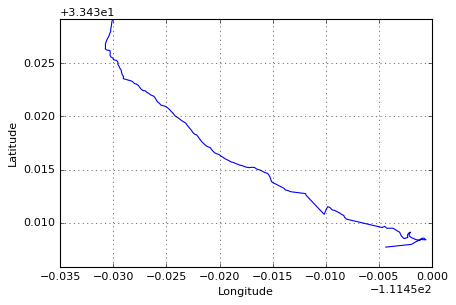

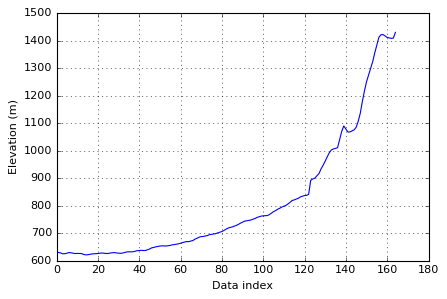

In [21]:
import matplotlib.pyplot as plt

plt.plot(data['Longitude'], data['Latitude'])
plt.axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

plt.plot(data['Elevation'])
plt.xlabel('Data index')
plt.ylabel('Elevation (m)')
plt.grid(True)
plt.show()

# 2. Further practices with loading data from numpy and pandas

## 2.1 Reading data in using numpy.loadtxt()
Docs: http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [22]:
# In test_data/ there is a text file called spectrum.dat 
# with data that we want to load into python. 
# (spectrum.dat is a model stellar spectrum from starburst99 for 
# a group of stars with 0.7 x solar metallicity, 
# 1e4 solar masses population, Kroupa IMF and a starburst 1e6 years ago).

In [23]:
import numpy as np

spec_nparray = np.loadtxt('test_data/spectrum.dat', skiprows=6)

print(type(spec_nparray))

<class 'numpy.ndarray'>


In [24]:
# Shape of this numpy array will be determined by number of columns and rows in your data:
print(spec_nparray.shape)

(1221, 5)


In [25]:
# And if you want to extract e.g. the column containing wavelength data, 
# you need to remember its column index, in this case 1:
wavelength_A = spec_nparray[:,1]

print(wavelength_A)

[  9.10000000e+01   9.40000000e+01   9.60000000e+01 ...,   1.20000000e+06
   1.40000000e+06   1.60000000e+06]


In [26]:
# By default, numbers are loaded with float 64 bit precision: 
print(wavelength_A.dtype)

float64


## 2.2 Reading data in using numpy.genfromtxt()
Doc: http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

The `genfromtxt()` function from numpy is a bit more flexible.

In [27]:
spec_nparray2 = np.genfromtxt('test_data/spectrum.dat', skip_header=6, \
                              names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular'])
print(type(spec_nparray2))

<class 'numpy.ndarray'>


In [28]:
# Print the seventh value in the wavelength column.
print(spec_nparray[7,1])
print(spec_nparray2['wavelength_A'][7])

106.0
106.0


In [29]:
# Try to change one of the wavelengths into something that is not a number (like %%%) 
# and you will see that genfromtxt() can handle this if you specify the keywords:
# missing_values='%%%', filling_values=desired_value
spec_nparray2 = np.genfromtxt('test_data/spectrum_nan.dat', skip_header=6,\
                              names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular'],\
                              missing_values='%%%', filling_values=np.nan)

print(spec_nparray2['wavelength_A'][0])

nan


In [30]:
# But loadtxt() will crash:
spec_nparray = np.loadtxt('test_data/spectrum_nan.dat', skiprows=6)

ValueError: could not convert string to float: b'%%%'

## 2.3 Read data into pandas dataframe
Typically, a smarter way (if you are essentially loading a matrix) is to load the data directly into a pandas dataframe. The function read_table (almost identical to read_table) can be used to read an ascii file into a dataframe:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [31]:
import pandas as pd

names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular']
spec_dataframe = pd.read_table('test_data/spectrum.dat', \
                               names=names,              \
                               skiprows=6,               \
                               sep=r"\s*",               \
                               engine='python')    
print(type(spec_dataframe))

<class 'pandas.core.frame.DataFrame'>


Note about engine: The C engine is faster while the Python engine is currently more feature-complete. The C engine cannot automatically detect the separator, but the Python parsing engine can, meaning the latter will be used and automatically detect the separator by Python’s builtin sniffer tool, csv.Sniffer. In addition, separators longer than 1 character and different from '\s+' will be interpreted as regular expressions and will also force the use of the Python parsing engine. 

In [32]:
spec_dataframe['t_yr'][1]

10010000.0

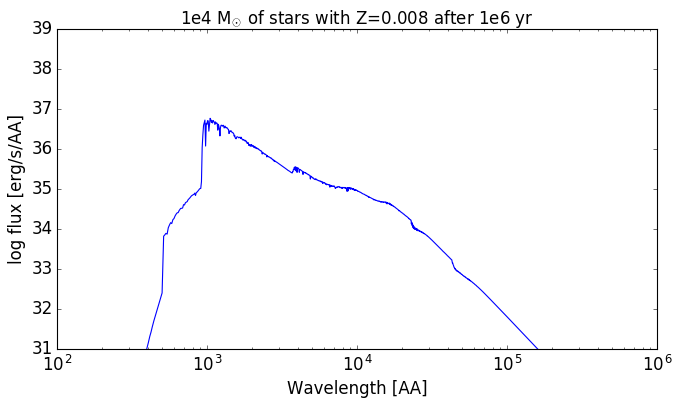

In [33]:
# Plot spectrum
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

fig          =   plt.figure(0, figsize=(10,5))
ax1          =   fig.add_axes([0.15,0.1,0.75,0.8])
ax1.set_ylim(31,39)
ax1.set_xlim(1e2,1e6)
ax1.set_xscale('log')
ax1.set_xlabel('Wavelength [AA]', fontsize=15)
ax1.set_ylabel('log flux [erg/s/AA]', fontsize=15)
ax1.set_title('1e4 M$_{\odot}$ of stars with Z=0.008 after 1e6 yr', fontsize=15)#+str(t1)+' yr')
#ax1.plot(spec_nparray[:,1],spec_nparray[:,2],'b')
#ax1.plot(spec_nparray2['wavelength'],spec_nparray2['L_tot'],'b')
ax1.plot(spec_dataframe['wavelength_A'], spec_dataframe['L_tot'],'b')

plt.show()

Pandas has a function that saves (serializes) a dataframe:

In [34]:
spec_dataframe.to_pickle('test_data/spec_dataframe_pickle') # no extension
load_spec_dataframe_pickle = pd.read_pickle('test_data/spec_dataframe_pickle')
load_spec_dataframe_pickle['t_yr'][0] # test

10010000.0

By default, the to_pickle function will use the highest "protocol" possible to save the dataframe in binary format:
<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html

* Protocol version 0 is the original ASCII protocol and is backwards compatible with earlier versions of Python.
* Protocol version 1 is the old binary format which is also compatible with earlier versions of Python.
* Protocol version 2 was introduced in Python 2.3. It provides much more efficient pickling of new-style classes.
* Higher protocol versions were introduced in Python 3.

To check what your default highest protocol is:

In [35]:
import pickle as pickle
pickle.HIGHEST_PROTOCOL

4

Forcing protocol=0, results in a slightly larger datafile:

In [36]:
spec_dataframe.to_pickle('test_data/spec_dataframe_pickle_p0', protocol=0) # no extension

Ultimately it depends a bit on what the dataframe contains, see a comparison here of different ways to save dataframes: 
http://matthewrocklin.com/blog/work/2015/03/16/Fast-Serialization

## 2.4 Fits files from astropy

In test_data/ there is a file called cloud.fits with data that we want to import into Python. 
(cloud.fits is a simulated HCO+ data cube of a cloud, calculated with the radiative transfer code LIME)

First we need the fits module from astropy.io to open the fits file as a class object:

In [37]:
from astropy.io import fits

fits_file = fits.open('test_data/cloud.fits')
print(type(fits_file))

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


//anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


(HDU = Header Data Unit)<br>
Next, we can get some basic info about the fits file:

In [38]:
fits_file.info()

Filename: test_data/cloud.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      34   (100, 100, 61)   float32   


And display all header "cards":

In [39]:
print(fits_file[0].header) 

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  100 / length of data axis 1                          NAXIS2  =                  100 / length of data axis 2                          NAXIS3  =                   61 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H OBJECT  = 'LIMEMDL '                                                            EPOCH   =                2000.                                                  LONPOLE =                 180.                                                  EQUINOX =                2000.          

Now we can extract the info that we're interested in like this:

In [40]:
imgres = fits_file[0].header['CDELT2']
print('Image resolution: %.6s degrees ' % imgres)
npix = fits_file[0].header['NAXIS3']
print('Number of pixels on each side: %s' % npix)
velres = fits_file[0].header['CDELT3']
print('Velocity resolution: %s m/s' % velres)

Image resolution: 2.7777 degrees 
Number of pixels on each side: 61
Velocity resolution: 500.0 m/s


And we can change any of these parameters:

In [41]:
fits_file[0].header['CDELT2']=2.0
imgres = fits_file[0].header['CDELT2']
print('Image resolution: %.6s degrees ' % imgres)

Image resolution: 2.0 degrees 


The actual data is an attribute of data[0]:

In [42]:
HCO_flux = fits_file[0].data 
print(np.shape(HCO_flux))

(61, 100, 100)


In this case, I know that the 60x100x100 matrix is in the format [velocity channels, x axis, y axis], so we can create the moment 0 map as:

In [43]:
mom0 = HCO_flux.sum(axis=0)*velres/1000 # moment 0 map, Jy*km/s

And make a contour plot of this map:

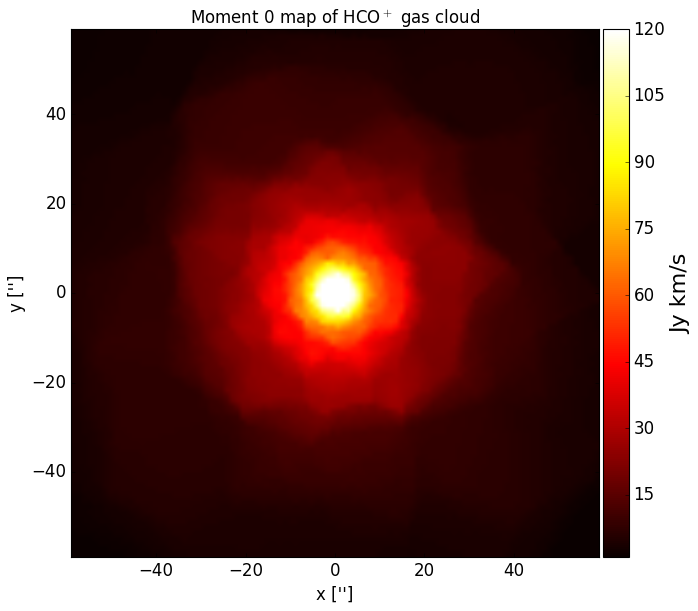

In [44]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig         =   plt.figure(1,figsize=(9,9))
ax1         =   fig.add_subplot(1,1,1)
ax1.set_xlabel("x ['']",fontsize=15)
ax1.set_ylabel("y ['']",fontsize=15)
ax1.set_title("Moment 0 map of HCO$^+$ gas cloud",fontsize=15)
x1 = imgres*(np.arange(npix)-npix/2) # image axis
xmax = max(x1)
im = ax1.imshow(mom0,interpolation='bilinear',origin='lower',\
                cmap=cm.hot,extent=(-xmax,xmax,-xmax,xmax),vmax=120)

# Add colorbar that matches image in height
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.set_label('Jy km/s', size=20)

plt.show(block=False)

# 3. Saving data for later with numpy
Docs: 
<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html
<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

In [ ]:
# Say you have a numpy array that you want to save to a file and load later. 
# One way to do so is with numpy:
np.save('test_data/spec_nparray', spec_nparray) # will get a '.npy' extension

In [ ]:
# Test - using numpy.load()
load_spec_nparray = np.load('test_data/spec_nparray.npy')
load_spec_nparray[7,1]

# 4. Pickling
Docs: 
<br>
https://docs.python.org/3/library/pickle.html
<br>
https://docs.python.org/2.3/lib/module-cPickle.html

In [ ]:
# You can also use cPickle! Which is pickle written in C, with several advantages.
import cPickle as pickle

# 'wb' is the protocol and means to write to binary format, no need to specify extension
pickle.dump(spec_nparray, open('test_data/spec_nparray_pickle','wb'))

load_spec_nparray = pickle.load(open('test_data/spec_nparray_pickle','rb'))
load_spec_nparray[7,1] # Test

In [ ]:
# But the to_pickle attribute is specific to pandas and will not work on say a numpy array:
spec_nparray.to_pickle('test_data/spec_dataframe_pickle')